## 1. Get the set of antibodies to test

In [10]:
import pandas as pd

df = pd.read_csv('../data/AIntibody_COMPETITION_2_3.csv')
df = df.dropna(subset=['cluster_cdr3_heavy', 'cdr1_aa_heavy', 'cdr2_aa_heavy', 'cdr3_aa_heavy', 'cdr1_aa_light', 'cdr2_aa_light', 'cdr3_aa_light'],
                how='any')

test_sets = df.groupby('cluster_cdr3_heavy')

## 2. Prepare directory to store data

In [11]:
import os

clusters = [cluster for cluster, _ in test_sets]

os.makedirs('../data/comp_2', exist_ok=True)
os.makedirs('../data/comp_2/test', exist_ok=True)
os.makedirs('../data/comp_2/pred', exist_ok=True)

for cluster, group in test_sets:
    sequences = [heavy + ':' + light for heavy, light in zip(group['sequence_aa_heavy'], group['sequence_aa_light'])]
    group['sequence'] = sequences
    group.to_csv(f'../data/comp_2/test/{cluster}.csv', index=False)


## 2. Make affinity predictions

In [5]:
import subprocess

# Build the docker image
cwd = os.getcwd()
os.chdir('../tools/affinity_challenge_2')
subprocess.run(['docker', 'build', '-t', 'affinity_challenge_2', '.'])
os.chdir(cwd)

#0 building with "default" instance using docker driver

#1 [internal] load build definition from Dockerfile
#1 transferring dockerfile: 639B done
#1 DONE 0.1s

#2 [internal] load metadata for docker.io/continuumio/miniconda3:latest
#2 DONE 1.0s

#3 [internal] load .dockerignore
#3 transferring context: 2B done
#3 DONE 0.1s

#4 [1/5] FROM docker.io/continuumio/miniconda3:latest@sha256:6a66425f001f739d4778dd732e020afeb06175f49478fafc3ec673658d61550b
#4 resolve docker.io/continuumio/miniconda3:latest@sha256:6a66425f001f739d4778dd732e020afeb06175f49478fafc3ec673658d61550b 0.1s done
#4 DONE 0.1s

#5 [2/5] WORKDIR /app
#5 CACHED

#6 [internal] load build context
#6 transferring context: 3.77kB done
#6 DONE 0.1s

#7 [3/5] COPY environment.yml /app/environment.yml
#7 DONE 0.1s

#8 [4/5] RUN conda env create -f /app/environment.yml
#8 1.173 Channels:
#8 1.173  - microsoft
#8 1.173  - conda-forge
#8 1.173  - defaults
#8 1.173 Platform: linux-64
#8 1.173 Collecting package metadata (repodata.jso

In [9]:
#2. Run tool on test data with `docker run --rm -v "$(pwd)/../test:/app/data" deepsp-image --input /app/data/sequences.csv --output /app/data/deep_sp.csv`

for cluster in clusters:
    #subprocess.run(['docker', 'run', '--rm', '-v', f'{os.getcwd()}/../data/comp_2/test:/app/data', 'affinity_challenge_2', '--input', f'/app/data/{cluster}.csv', '--output', f'/app/data/{cluster}.pred.csv'])

    # move the predictions to the pred folder
    os.rename(f'../data/comp_2/test/{cluster}.csv', f'../data/comp_2/pred/{cluster}_affinity.csv')

In [34]:
df = pd.read_csv(f'../data/comp_2/pred/28F_affinity.csv')
#
df = pd.concat([df, pd.read_csv(f'../data/comp_2/test/28F.csv')], axis=1)
df.sort_values('predicted_affinity', inplace=True)
df[['cdr1_aa_heavy', 'cdr2_aa_heavy', 'cdr3_aa_heavy', 'cdr1_aa_light', 'cdr2_aa_light', 'cdr3_aa_light', 'predicted_affinity']]
df

,predicted_affinity,characterized,lsa_bin,cluster_cdr3_heavy,affinity,on_rate,off_rate,sequence_aa_light,sequence_aa_heavy,cdr1_aa_heavy,cdr2_aa_heavy,cdr3_aa_heavy,cdr1_aa_light,cdr2_aa_light,cdr3_aa_light,relative_abundance_10nM,relative_abundance_1nM,sequence
72,0.034983,False,NaN,28F,NaN,NaN,NaN,DIQMTQSPSSVSASVGDRVTITCRASQSIGTYLAWYQQKPGKAPKL...,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...,GYSFTDHS,INPNIGDT,ARDGYDFWSGSYGMDV,QSIGTY,SGSTLQS,HQYATYPWT,0.000000,0.002271,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...
2232,0.074033,False,NaN,28F,NaN,NaN,NaN,DIQMTQSPSSVSASVGDRVTITCRASQSIGTYLAWYQQKPGKAPKL...,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTSHTIHWVRQAPGKGLE...,GYSFTSHT,INPDIGDT,ARDGYDFWSGSYGMDV,QSIGTY,SGSTLQS,QQYNRYPWA,0.001692,0.000000,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTSHTIHWVRQAPGKGLE...
2,0.108713,True,1.0,28F,1.750000e-10,226545.4322,0.00004,DIQMTQSPSSVSASVGDRVTITCRASQSIGTYLAWYQQKPGKAPKL...,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...,GYSFTDHS,INPYTGDT,ARDGYDFWSGSYGMDV,QSIGTY,SGSTLQS,HQYATYPWT,0.011845,0.011353,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...
664,0.116442,False,NaN,28F,NaN,NaN,NaN,DIQMTQSPSSVSASVGDRVTITCRASRDISHHLAWYQQKPGKAPKL...,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...,GYSFTDHS,INPNIGDT,ARDGYDFWSGSYGMDV,RDISHH,AGSSRAS,HQYATYPWT,0.000000,0.002271,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...
2803,0.120407,False,NaN,28F,NaN,NaN,NaN,DIQMTQSPSSVSASVGDRVTITCRASRDISHHLAWYQQKPGKAPKL...,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...,GYSFTDHS,INPNIGDT,ARDGYDFWSGSYGMDV,RDISHH,AGSSRAS,HQYNAYPWT,0.001692,0.000000,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,0.636304,False,NaN,28F,NaN,NaN,NaN,DIQMTQSPSSVSASVGDRVTITCRASHSISTYLAWYQQKPGKAPKL...,QVQLVQSGAEVKKPGASVKVSCKVSGYTFTNDAIHWVRQAPGKGLE...,GYTFTNDA,INPSLGDT,ARDGYDFWSGSYGMDV,HSISTY,GASSRAT,HQYATYPWT,0.001692,0.000000,QVQLVQSGAEVKKPGASVKVSCKVSGYTFTNDAIHWVRQAPGKGLE...
2483,0.650657,False,NaN,28F,NaN,NaN,NaN,DIQMTQSPSSVSASVGDRVTITCRASQNIFRYLAWYQQKPGKAPKL...,QVQLVQSGAEVKKPGASVKVSCKVSGYPFTSYAIHWVRQAPGKGLE...,GYPFTSYA,INPYSGDT,ARDGYDFWSGSYGMDV,QNIFRY,DTFNRAT,QQYDQYPIT,0.000000,0.002271,QVQLVQSGAEVKKPGASVKVSCKVSGYPFTSYAIHWVRQAPGKGLE...
899,0.651148,False,NaN,28F,NaN,NaN,NaN,DIQMTQSPSSVSASVGDRVTITCRASHSISNYLAWYQQKPGKAPKL...,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...,GYSFTDHS,INPRDATT,ARDGYDFWSGSYGMDV,HSISNY,GASSRAT,HQYATYPWT,0.001692,0.000000,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...
8,0.656977,True,1.0,28F,1.000000e-06,NaN,NaN,DIQMTQSPSSVSASVGDRVTITCRASHSISNYLAWYQQKPGKAPKL...,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...,GYSFTDHS,INPYTGDT,ARDGYDFWSGSYGMDV,HSISNY,GASSRAT,HQYATYPWT,0.008461,0.024977,QVQLVQSGAEVKKPGASVKVSCKVSGYSFTDHSIHWVRQAPGKGLE...


Text(0, 0.5, 'True Affinity')

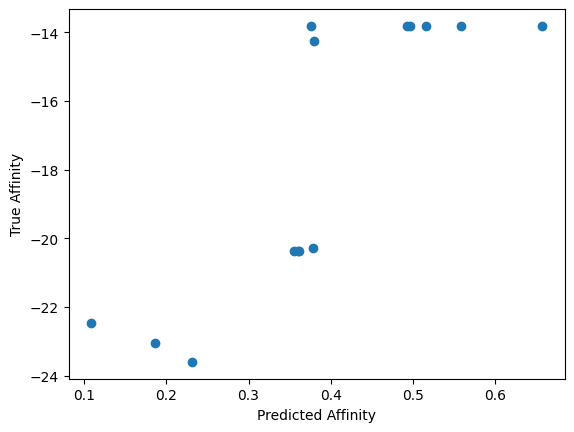

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['predicted_affinity'], np.log(df['affinity']))
plt.xlabel('Predicted Affinity')
plt.ylabel('True Affinity')

In [39]:
import json 

with open('/home/alex/AIntibody/data/equal_mutations.json', 'r') as f:
    data = json.load(f)

with open('/home/alex/AIntibody/data/equal_mutations.json', 'w') as f:
    json.dump(data, f, indent=4)

In [20]:
pd.read_csv(f'../data/comp_2/test/27F.csv').shape

(2524, 17)

In [19]:
df.shape

(2524, 18)